<p align="center">
  <img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExcG93MmF5czhkc2d1OGsxeXpzaXE1MTd5MTlrZm5qbzZvM21razhhbyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/9jwR2KCuAf8aIANOUr/giphy.gif" alt="animated />
</p>

<div style="text-align: center;">
  <img src="https:/media.giphy.com/media/9jwR2KCuAf8aIANOUr/giphy.gif" alt="discoscope">
</div>

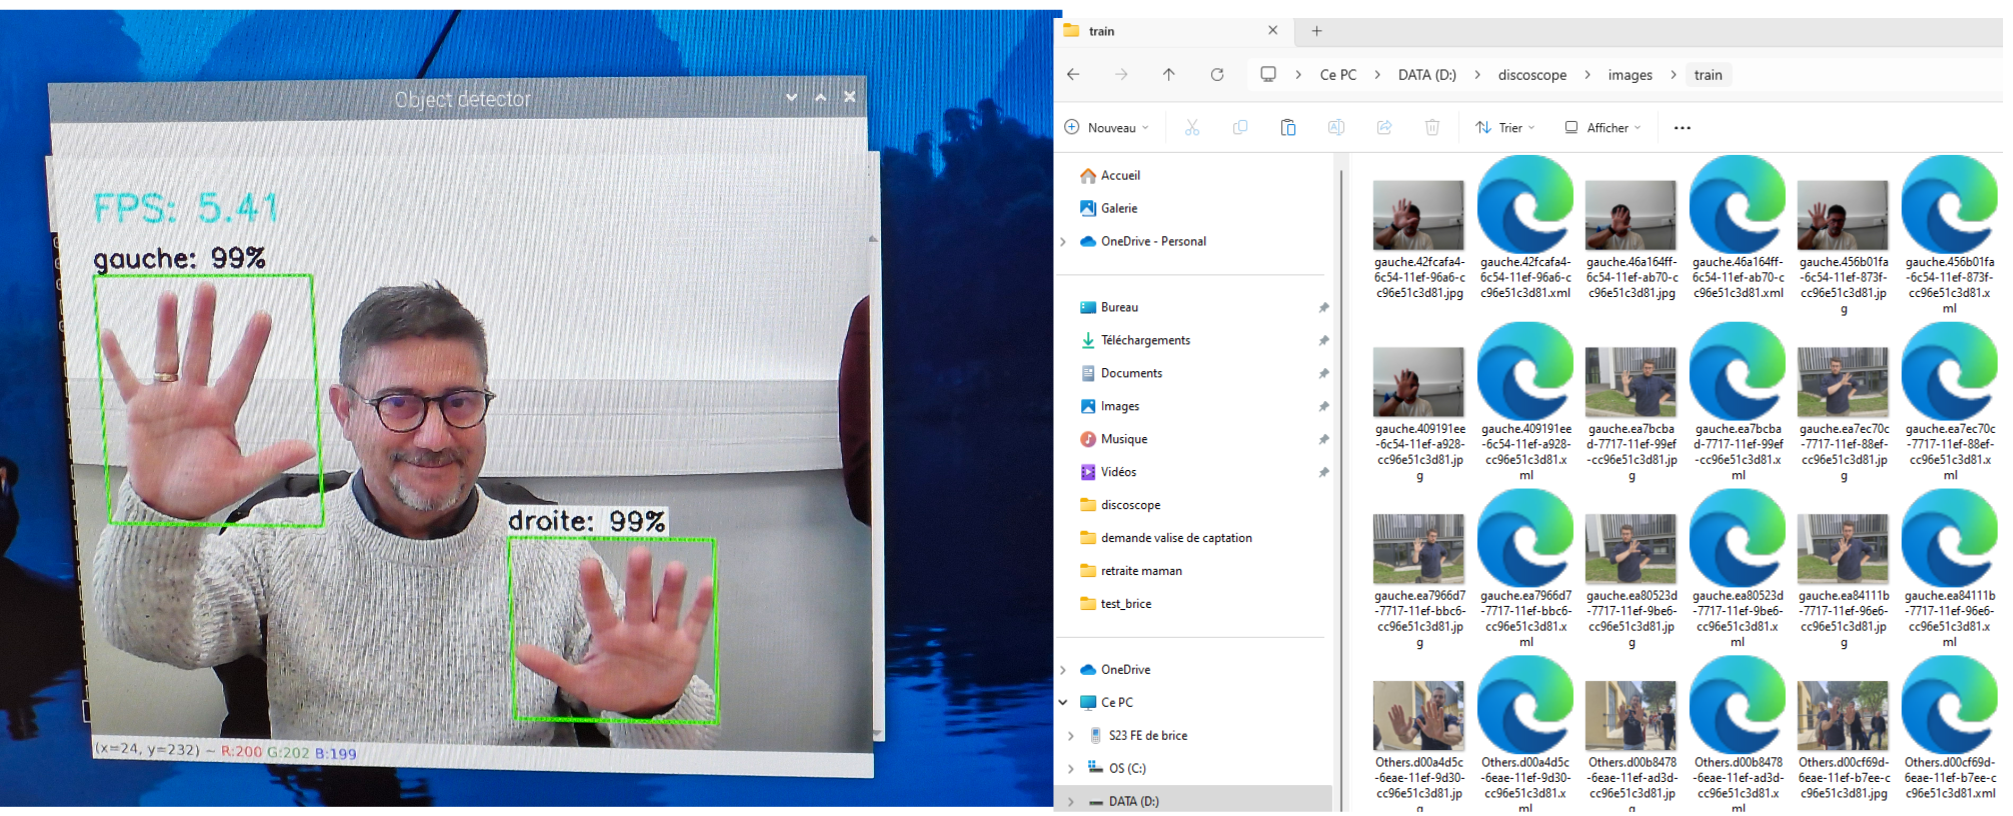

In [ ]:
https://media.giphy.com/media/9jwR2KCuAf8aIANOUr/giphy.gif

# 1. Installer et importer les bibliothèques nécéssaires #

On va mettre à jour la fonction d'installation de python en fait pip 

In [2]:
!python -m pip install --upgrade pip

  Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.2.3
    Uninstalling pip-20.2.3:
      Successfully uninstalled pip-20.2.3


<font size="5"> Installer la biblothèque OpenCV dans votre environnement.</font></p>
OpenCV pour "Open Computer Vision" est une librairie open source, considérée comme l’outil standard pour la vision par ordinateur et le traitement d’images et utilisée pour le Deep Learning et la reconaissance de forme 

In [8]:
!pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)


In [8]:
WORK_PATH=%pwd
WORK_PATH=WORK_PATH.replace("\\","/")
print(WORK_PATH)

D:/bibi/mifobio_discoscope


#### on va programmer ensuite notre code python et importer les biliothèques nécéssaires

In [1]:
# Import opencv
import cv2 

# Import uuid pour Universal Unique Identifier, bibliothèque permettant d'assigner  un nombre de 128 bits  pour identifier individuellement 
# les données dans les systèmes informatiques dans notre cas les images que nous allons sauvegarder.
import uuid

# Import Operating System bibliothèque permettant d'interagir avec le système d'exploitation
import os

# Import time bibliothèque permettant la gestion du temps
import time

si L'OS importé est windows, alors la reponse sera "nt" </p>
par contre si l'OS est du Lynux, alors la réponse sera "posix"</p>
pour le savoir une fois la bibliothèque importée il suffit d'imprimer la réponse par os.name

In [2]:
os.name

'nt'

# 2. Définir les labels que l'on souhaite identifier 

In [3]:
labels = ['droite', 'gauche', 'double_f']
# on definit le nombre d'images que l'on souhaite prendre avec la webcam 
number_imgs = 20

# 3. Création des dossiers ou enregistrer les images de la webcam et/ou </br> le dossier ou copier les images dejà enregistrées par d'autres médias 

In [4]:
IMAGES_PATH = os.path.join('images', 'collectedimages')
IMAGES_OTHERS = os.path.join(IMAGES_PATH,'img_others')

In [5]:
## si le dossiers n'existent pas
if not os.path.exists(IMAGES_PATH):
    
    # si l'OS est Linux 
    if os.name == 'posix':
        # on crée les dossiers Tensorflow , workspace, images, et collectedimages 
        !mkdir -p {IMAGES_PATH}
        
    #si l'OS est windows
    if os.name == 'nt':
        # on crée les dossiers Tensorflow , workspace, images, et collectedimages
        !mkdir {IMAGES_PATH}
        !mkdir {IMAGES_OTHERS}
        
# pour tous les labels que l'on a defini on crée les dossier au même nom 
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

In [6]:
print(IMAGES_OTHERS)

Tensorflow\workspace\images\collectedimages\img_others


# 4. Enregistrement des images 

<font size="5"> Nous allons enregistrer les images dans le ou les dossiers correpondant</font></p>

pour cela nous alons vous présenter deux méthodes : </p>
4.1 A partir de capture d'image d'une webcam </p>
4.2 A partir d'images déjà enregistrées par d'autres support (appareil photos, mobile, tabellette, etc..) </p>
A vous de choisir les cellules que vous souhaitez lancer 4.1 ou 4.2

## 4.1 A partir de capture d'image par la webcam

In [41]:
# pour tous les labels que l'on a deffini 
for label in labels:
    # on capture l'image de la webcam (en 0) en général si une seule webcam
    cap = cv2.VideoCapture(0)
    print('Collecting images for {}'.format(label))
    # on attend 5 seconde avant de demarer
    time.sleep(5)
    # pour le nombre d'image à enregistrer que l'on a defini
    for imgnum in range(number_imgs):
        print('Collecting image {}'.format(imgnum))
        # on lit l'image capturée par la webcam
        ret, frame = cap.read()
        # on flip l'image sur l'axe x pour avoir une image mirroir
        flipimg=cv2.flip(frame,1)
        # on défini une variable imgname qui portera un numéro uuid unique avec l'extention jpg
        imgname = os.path.join(IMAGES_PATH,label,label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        #on sauvegarde l'image capturée par la webcam avec comme nom le numéro UUID+jpg dans le dossier correspondant
        cv2.imwrite(imgname, flipimg)
        # on montre l'image à l'écran (attention très lent)
        cv2.imshow('frame', flipimg)
        time.sleep(2)
        
# si on appuie sur le boutton q du clavier on arrte le processus 
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
# on arrete la webcam et on ferme toutes les fenêtres             
cap.release()
cv2.destroyAllWindows()

In [7]:
# on importe la bibliothèque glob permettant la recherche de chemin 
import glob

# pour tous les labels que l'on a deffini 
for label in labels:
    path_sav = os.path.join(IMAGES_PATH,label)
    for img in glob.glob(path_sav+"/*.jpg"):
        # on lit l'image avec OPENCV
        n=cv2.imread(img)
        # # on défini une variable imgname qui portera un numéro uuid unique avec l'extention jpg
        imgname = os.path.join(IMAGES_OTHERS,label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        print(imgname)
    #on sauvegarde l'image avec comme nom : Other.+ le numéro UUID+jpg dans le dossier selectionné
        cv2.imwrite(imgname, n)
print("Done")
        

Tensorflow\workspace\images\collectedimages\img_others\droite.e9a8185c-797b-11ef-b15f-cc96e51c3d81.jpg
Tensorflow\workspace\images\collectedimages\img_others\droite.e9a9e26c-797b-11ef-b439-cc96e51c3d81.jpg
Tensorflow\workspace\images\collectedimages\img_others\droite.e9aadb62-797b-11ef-8ca3-cc96e51c3d81.jpg
Tensorflow\workspace\images\collectedimages\img_others\droite.e9ac7707-797b-11ef-84e4-cc96e51c3d81.jpg
Tensorflow\workspace\images\collectedimages\img_others\droite.e9acb514-797b-11ef-b423-cc96e51c3d81.jpg
Tensorflow\workspace\images\collectedimages\img_others\droite.e9af1034-797b-11ef-a31e-cc96e51c3d81.jpg
Tensorflow\workspace\images\collectedimages\img_others\droite.e9af1035-797b-11ef-a6ce-cc96e51c3d81.jpg
Tensorflow\workspace\images\collectedimages\img_others\droite.e9b19cd1-797b-11ef-bf47-cc96e51c3d81.jpg
Tensorflow\workspace\images\collectedimages\img_others\droite.e9b1c958-797b-11ef-b55c-cc96e51c3d81.jpg
Tensorflow\workspace\images\collectedimages\img_others\droite.e9b41d6a-79

## 4.2 A partir d'images déjà enregistrées par d'autres support </br>(appareil photos, mobile, tablette, etc..)

In [8]:
# on installe la bibliothèque ipyfilechooser permettant dans jupyter notebook de choisir le dossier ou sont stocker les images 
# si elles ont été enregistrées avec un autre périphérique que la webcam !!! attention au même format que les images enregistrées 
# par la webcam à savoir 640x480
!pip install ipyfilechooser==0.5.0

In [9]:
# on importe la bibliothèque ipyfilechooser
from ipyfilechooser import FileChooser

fc = FileChooser('')
#on affiche dans jupyter notebook un bouton change 
#(appuyer dessus et choisir la première image du dossier ou sont contenu toutes vos images et cliquez sur change
display(fc)

FileChooser(path='.', filename='', title='HTML(value='', layout=Layout(display='none'))', show_hidden='False',…

In [12]:
# on importe la bibliothèque glob permettant la recherche de chemin 
import glob

# pour toutes les images du dossier selectionné dans la cellule précédente
for img in glob.glob(fc.selected_path+"/*.jpg"):
    # on lit l'image avec OPENCV
    n=cv2.imread(img)
    # # on défini une variable imgname qui portera un numéro uuid unique avec l'extention jpg 
    imgname = os.path.join(IMAGES_OTHERS+'/'+'Others.'+'{}.jpg'.format(str(uuid.uuid1())))
     #on sauvegarde l'image avec comme nom : Other.+ le numéro UUID+jpg dans le dossier selectionné
    cv2.imwrite(imgname, n)
print("Done")

Done


# 5. Annotations des images

In [8]:
!pip install --upgrade pyqt5 lxml

  Using cached PyQt5-5.15.11-cp38-abi3-win_amd64.whl (6.9 MB)
  Using cached PyQt5-5.15.10-cp37-abi3-win_amd64.whl (6.8 MB)
  Using cached lxml-5.3.0-cp38-cp38-win_amd64.whl (3.8 MB)
  Using cached lxml-5.2.2-cp38-cp38-win_amd64.whl (3.8 MB)


In [9]:
LABELIMG_PATH = os.path.join('Tensorflow', 'labelimg')

In [10]:
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

In [11]:
if os.name == 'posix':
    !make qt5py3
if os.name =='nt':
    !cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd {LABELIMG_PATH} && python labelImg.py